# Explore Exercises
Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the ```Zillow``` data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from ```2017```.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Decision Tree and Model Evaluation Imports
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# import sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.metrics import classification_report 

# import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

# assists with processor speed
#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 10000

import matplotlib.pyplot as plt
# Increases Display Resolution for Graphs 
# Only works inside notebook
%matplotlib inline 

# import Environment and Helper Files
from env import user, password, host
#import QMCBT_00_quicktips as qt
#import QMCBT_01_acquire as acquire
#import QMCBT_02_prepare as prepare
#import QMCBT_03_explore as explore
#import QMCBT_04_modeling as model
#import QMCBT_05_evaluate as evaluate
import QMCBT_explore_evaluate as ee
import QMCBT_wrangle as w

# set constants
α = 0.05
alpha = 0.05
np.random.seed(1992)
#random_state=1992

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# Left Align Tables in Jupyter Notebook
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

In [2]:
# allows import reload without needing to clear kernel and rerun
# reload(packagename) 
from importlib import reload

# This code refreshes all of my helper files (w/o the need to stop the kernel)
#reload(qt)
#reload(acquire)
#reload(prepare)
#reload(explore)
#reload(model)
#reload(evaluate)
reload(ee)
reload(w)

<module 'QMCBT_wrangle' from '/Users/qmcbt/codeup-data-science/project-2_zillow/QMCBT_wrangle.py'>

#### This CSS code allows the left alignment of tables in Jupyter Notebooks

In [45]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

# 1. As with ```encoded``` vs. ```unencoded``` data, we recommend exploring ```un-scaled``` data in your EDA process.

# 2. Make sure to perform a ```train```, ```validate```, ```test``` split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

In [2]:
# use custom wrangle function to automate Acquire and Prepare
df = w.wrangle_zillow()

In [3]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2013746,2013747,2013748,2013749,2013750,2013751,2013752,2013753,2013754,2013755
bedrooms,4,3,3,3,3,3,4,3,4,3,...,4,3,3,3,4,3,4,4,3,4
bathrooms,2.0,4.0,2.0,1.0,2.0,2.0,4.0,2.5,3.5,2.5,...,3.0,2.5,3.5,2.0,2.0,2.5,3.0,4.5,2.5,4.0
bath_to_bed_ratio,2.0,0.75,1.5,3.0,1.5,1.5,1.0,1.2,1.1429,1.2,...,1.3333,1.2,0.8571,1.5,2.0,1.2,1.3333,0.8889,1.2,1.0
sqft,3633,1620,2077,1244,1300,1222,4144,1821,2684,2284,...,2541,2033,1980,1917,1987,1809,2262,3127,1974,2110
yearbuilt,2005,2011,1926,1950,1950,1951,2016,2013,2014,2014,...,2013,2015,2014,1946,1955,2012,2015,2014,2015,2014
age,12,6,91,67,67,66,1,4,3,3,...,4,2,3,71,62,5,2,3,2,3
tax_appraisal,296425,847770,646760,169471,233266,290492,1303522,537949,644990,934353,...,1156108,641757,773358,408680,259913,405547,960756,536061,424353,554009
tax_bill,6941.39,10244.94,7924.68,2532.88,3110.99,3870.25,14820.1,6173.72,7572.58,13273.94,...,15568.38,10009.46,8347.9,4341.32,3175.66,4181.1,13494.52,6244.16,5302.7,6761.2
tax_percentage,0.0234,0.0121,0.0123,0.0149,0.0133,0.0133,0.0114,0.0115,0.0117,0.0142,...,0.0135,0.0156,0.0108,0.0106,0.0122,0.0103,0.014,0.0116,0.0125,0.0122
fips,6037,6037,6037,6037,6037,6037,6037,6059,6059,6059,...,6059,6059,6059,6111,6059,6059,6059,6059,6059,6037


In [4]:
train, validate, test = w.split(df)

________________________________________________________________
|                              DF                              |
|--------------------:--------------------:--------------------|
|        Train       |      Validate      |        Test        |
:--------------------------------------------------------------:


Prepared df: (2013756, 12)

      Train: (1208253, 12) - 60.0%
   Validate: (402751, 12) - 20.0%
       Test: (402752, 12) - 20.0%


In [5]:
ee.cs_vis_types()

Types of Visualization


- **Univariate Distributions**

    - Continuous variable distributions
        - histogram
        - boxplot
        - displot

    - Discrete variable distributions
        - countplot


- **Bi- and multi-variate relationships**

    - Continuous with Continuous
        - scatter
        - line
        - pairplot
        - heatmap
        - relplot

    - Discrete with Continuous
        - violin
        - catplot
        - sunburst
        - boxplot
        - swarmplot
        - striplot

    - Discrete with Discrete
        - heatmap


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208253 entries, 0 to 1208252
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   bedrooms           1208253 non-null  Int64  
 1   bathrooms          1208253 non-null  Float64
 2   bath_to_bed_ratio  1208253 non-null  Float64
 3   sqft               1208253 non-null  Int64  
 4   yearbuilt          1208253 non-null  Int64  
 5   age                1208253 non-null  Int64  
 6   tax_appraisal      1208253 non-null  Int64  
 7   tax_bill           1208253 non-null  Float64
 8   tax_percentage     1208253 non-null  Float64
 9   fips               1208253 non-null  Int64  
 10  county             1208253 non-null  object 
 11  state              1208253 non-null  object 
dtypes: Float64(4), Int64(6), object(2)
memory usage: 122.1+ MB


In [7]:
def cat_cont_split(df):
    """
    This Function creates Categorical (cat) and Continuous (cont) variables and reads them into DataFrames.
    """

    cat_vars = []
    for col in df.columns:
        if df[col].dtypes == 'object':
            cat_vars.append(col)
    cat_vars = cat_vars

    cont_vars = []
    for col in df.columns:
        if df[col].dtypes != 'object':
            cont_vars.append(col)
    cont_vars = cont_vars
    
    cat_df = pd.DataFrame(df.drop(columns=cont_vars))
    cont_df = pd.DataFrame(df.drop(columns=cat_vars))
    
    return cat_df, cont_df, cat_vars, cont_vars

In [8]:
cat_cont_split(train)

(                     county state
 0        Los Angeles County    CA
 1             Orange County    CA
 2             Orange County    CA
 3        Los Angeles County    CA
 4        Los Angeles County    CA
 ...                     ...   ...
 1208248  Los Angeles County    CA
 1208249  Los Angeles County    CA
 1208250       Orange County    CA
 1208251      Ventura County    CA
 1208252  Los Angeles County    CA
 
 [1208253 rows x 2 columns],
          bedrooms  bathrooms  bath_to_bed_ratio  sqft  yearbuilt  age  \
 0               4        2.0                2.0  1404       1956   61   
 1               2        1.5             1.3333   960       1963   54   
 2               3        3.5             0.8571  4219       1985   32   
 3               3        2.0                1.5  1765       1954   63   
 4               3        1.0                3.0  1348       1942   75   
 ...           ...        ...                ...   ...        ...  ...   
 1208248         3        2.0  

In [9]:
ee.cat_cont_split(train)

(                     county state
 0        Los Angeles County    CA
 1             Orange County    CA
 2             Orange County    CA
 3        Los Angeles County    CA
 4        Los Angeles County    CA
 ...                     ...   ...
 1208248  Los Angeles County    CA
 1208249  Los Angeles County    CA
 1208250       Orange County    CA
 1208251      Ventura County    CA
 1208252  Los Angeles County    CA
 
 [1208253 rows x 2 columns],
          bedrooms  bathrooms  bath_to_bed_ratio  sqft  yearbuilt  age  \
 0               4        2.0                2.0  1404       1956   61   
 1               2        1.5             1.3333   960       1963   54   
 2               3        3.5             0.8571  4219       1985   32   
 3               3        2.0                1.5  1765       1954   63   
 4               3        1.0                3.0  1348       1942   75   
 ...           ...        ...                ...   ...        ...  ...   
 1208248         3        2.0  

In [10]:
ee.nunique_column_categorical(train)

county has 3 unique values.
state has 1 unique values.


cat_vars

cat_df

In [11]:
ee.nunique_column_continuous(train)

bedrooms has 8 unique values.
bathrooms has 17 unique values.
bath_to_bed_ratio has 71 unique values.
sqft has 6819 unique values.
yearbuilt has 147 unique values.
age has 147 unique values.
tax_appraisal has 414495 unique values.
tax_bill has 663300 unique values.
tax_percentage has 201 unique values.
fips has 3 unique values.


cont_vars

cont_df

In [12]:
cat_vars = []
for col in train.columns:
    if train[col].dtypes == 'object':
        cat_vars.append(col)

In [13]:
cont_vars = []
for col in train.columns:
    if train[col].dtypes != 'object':
        cont_vars.append(col)

In [14]:
cat_df = pd.DataFrame(train.drop(columns=cont_vars))
cont_df = pd.DataFrame(train.drop(columns=cat_vars))

In [15]:
cat_df

,county,state
0,Los Angeles County,CA
1,Orange County,CA
2,Orange County,CA
3,Los Angeles County,CA
4,Los Angeles County,CA
...,...,...
1208248,Los Angeles County,CA
1208249,Los Angeles County,CA
1208250,Orange County,CA
1208251,Ventura County,CA


In [16]:
cont_df

,bedrooms,bathrooms,bath_to_bed_ratio,sqft,yearbuilt,age,tax_appraisal,tax_bill,tax_percentage,fips
0,4,2.0,2.0,1404,1956,61,288931,3518.2,0.0122,6037
1,2,1.5,1.3333,960,1963,54,356000,4173.04,0.0117,6059
2,3,3.5,0.8571,4219,1985,32,1937246,19552.96,0.0101,6059
3,3,2.0,1.5,1765,1954,63,225118,2948.83,0.0131,6037
4,3,1.0,3.0,1348,1942,75,583024,7017.33,0.012,6037
...,...,...,...,...,...,...,...,...,...,...
1208248,3,2.0,1.5,2162,1911,106,283187,3540.51,0.0125,6037
1208249,4,3.0,1.3333,1924,1971,46,436158,5329.17,0.0122,6037
1208250,4,5.5,0.7273,5992,1968,49,1446907,15986.4,0.011,6059
1208251,4,2.5,1.6,1485,2015,2,303738,3411.08,0.0112,6111


In [17]:
cat_vars

['county', 'state']

In [18]:
cont_vars

['bedrooms',
 'bathrooms',
 'bath_to_bed_ratio',
 'sqft',
 'yearbuilt',
 'age',
 'tax_appraisal',
 'tax_bill',
 'tax_percentage',
 'fips']

<div class="alert alert-danger">



# 3. PLOT SOMETHING USEFUL FOR GOD'S SAKE!

#### AttributeError: 'int' object has no attribute 'view'
sns.pairplot(qty_df, hue="tax_appraisal", kind='hist', corner=True)

#### Just runs forever no output
sns.relplot(data=qty_df.astype('float64'), x="bedrooms", y="bathrooms", hue="tax_appraisal", kind="line")

<AxesSubplot:>

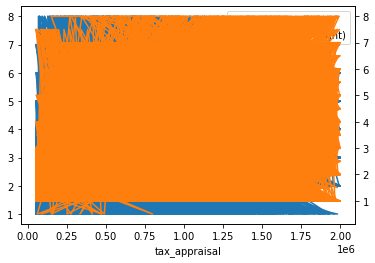

In [19]:
fig, ax = plt.subplots() # Create the figure and axes object

#### Plot the first x and y axes:
train.plot(x = 'tax_appraisal', y = 'bedrooms', ax = ax) 
#### Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
#### (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
df.plot(x = 'tax_appraisal', y = 'bathrooms', ax = ax, secondary_y = True) 

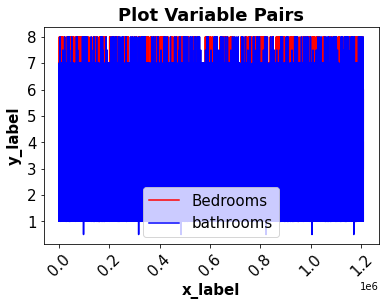

In [20]:
train['bedrooms'].plot(kind='line', color='red', label='Bedrooms')
train['bathrooms'].plot(kind='line', color='blue', label='bathrooms')
#train['bath_to_bed_ratio'].plot(kind='line', color='black', label='bath_to_bed_ratio')

plt.title('Plot Variable Pairs', fontsize=18, weight='bold')

plt.xlabel('x_label', fontsize=15, weight='bold')
plt.xticks(fontsize=15, rotation=45)

plt.ylabel('y_label', fontsize=15, weight='bold')
plt.yticks(fontsize=15)

plt.legend(loc='lower center', fontsize=15)
plt.show()

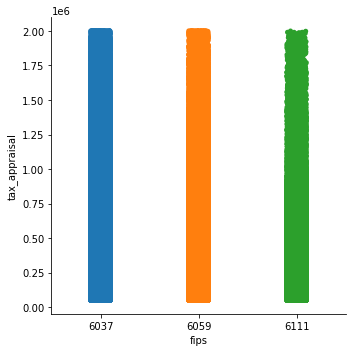

In [21]:
sns.catplot(data=train, y='tax_appraisal', x='fips')

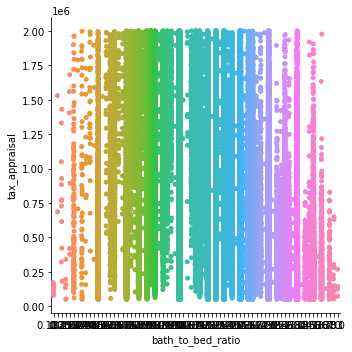

In [22]:
sns.catplot(data=train, y='tax_appraisal', x='bath_to_bed_ratio')

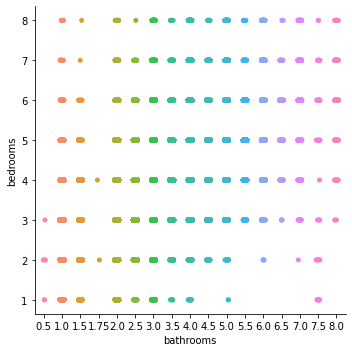

In [23]:
sns.catplot(data=train, y='bedrooms', x='bathrooms')

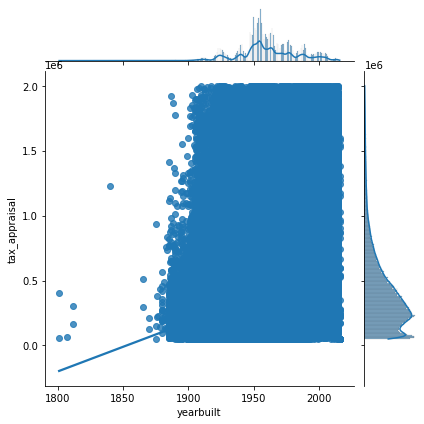

In [24]:
sns.jointplot(data=cont_df.astype('float64'), x=cont_df.astype('float64').yearbuilt, y=cont_df.astype('float64').tax_appraisal, kind='reg')

Text(0.5, 1.0, 'Features Correlating with Tax Appraisal')

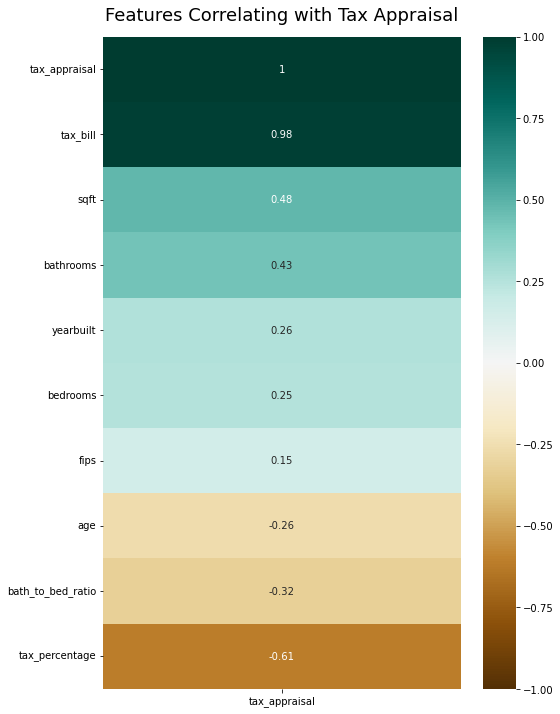

In [25]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='spearman')[['tax_appraisal']].sort_values(by='tax_appraisal', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Tax Appraisal', fontdict={'fontsize':18}, pad=16)

# 3. Write a function named ```plot_variable_pairs``` that accepts a ```dataframe``` as input and plots all of the pairwise relationships along with the regression line for each pair.

#### runs all the same color

def plot_variable_pairs1(df, target):
    for n in range(0, (len (df.columns))):
        sns.lmplot(x=df.columns[n], y=target, data=df)
        plt.show()
        
target = 'tax_appraisal'
plot_variable_pairs1(qty_df.astype('float64'), 'tax_appraisal')

#### cleaner argument than above also runs all the same color

def plot_variable_pairs2(df, target):
    for n in df.columns:
        sns.lmplot(x=n, y=target, data=df)
        plt.show()
        
target = 'tax_appraisal'
plot_variable_pairs2(qty_df.astype('float64'), target)

In [26]:
def plot_variable_pairs(df, target):
    """
    Takes in a dataframe and target variable and plots each feature with the target variable
    """

    cols = df.columns.to_list()
    cols.remove(target) 
    for col in cols:
        sns.lmplot(x=col, y=target, data=df, line_kws={'color': 'red'})
    
    return plt.show()

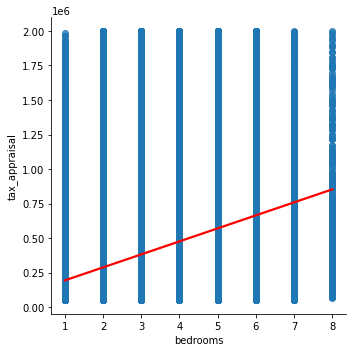

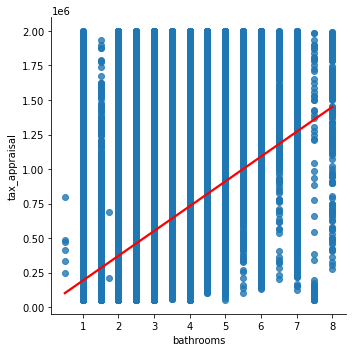

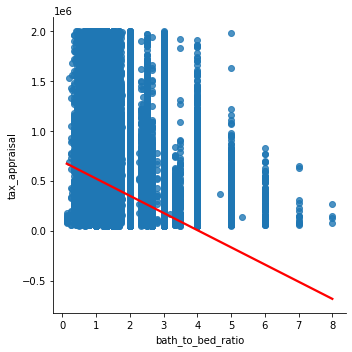

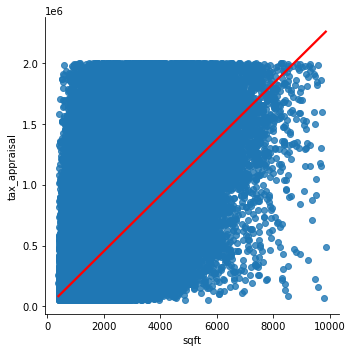

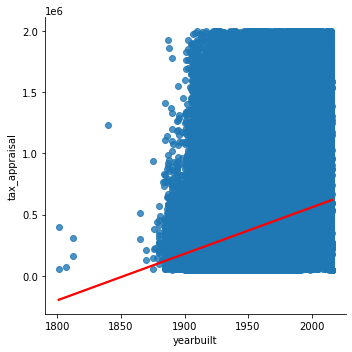

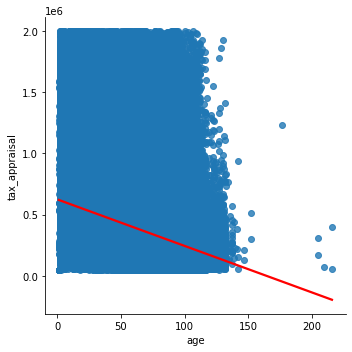

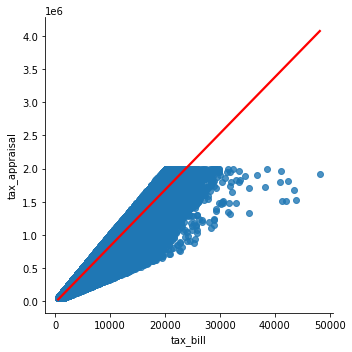

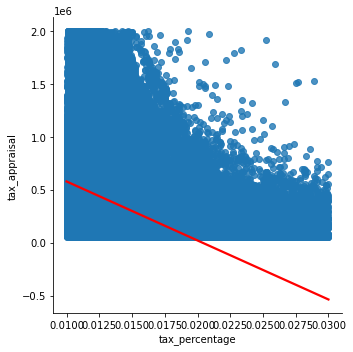

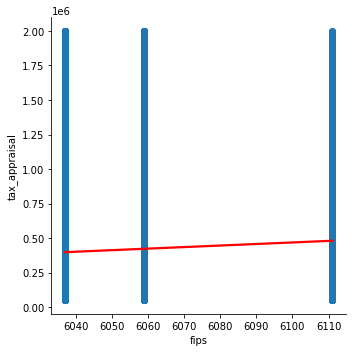

In [27]:
target = 'tax_appraisal'
plot_variable_pairs(cont_df.astype('float64'), target)

# 4. Write a function named ```plot_categorical_and_continuous_vars``` that accepts your ```dataframe``` and the name of the ```columns``` that hold the ```continuous``` and ```categorical``` features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [28]:
ee.cs_vis_types()

Types of Visualization


- **Univariate Distributions**

    - Continuous variable distributions
        - histogram
        - boxplot
        - displot

    - Discrete variable distributions
        - countplot


- **Bi- and multi-variate relationships**

    - Continuous with Continuous
        - scatter
        - line
        - pairplot
        - heatmap
        - relplot

    - Discrete with Continuous
        - violin
        - catplot
        - sunburst
        - boxplot
        - swarmplot
        - striplot

    - Discrete with Discrete
        - heatmap


#### Crashes my page
#### Sunburst

cols = ['bedrooms', 'bathrooms', 'sqft']
target = 'tax_appraisal'
ee.sunburst(train, cols, target)

#### ERROR!
#### AttributeError: 'float' object has no attribute 'shape'


collectn_1 = train.bedrooms
collectn_2 = train.bathrooms
collectn_3 = train.sqft
collectn_4 = train.tax_appraisal

## combine these different collections into a list
data_to_plot = [collectn_1, collectn_2, collectn_3, collectn_4]

# Create a figure instance
fig = plt.figure()

# Create an axes instance
ax = fig.add_axes([0,0,1,1])

# Create the boxplot
bp = ax.violinplot(data_to_plot)
plt.show()

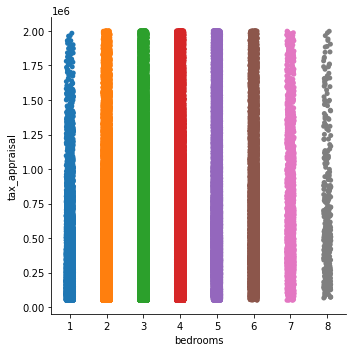

In [29]:
sns.catplot(data=train, x="bedrooms", y="tax_appraisal")

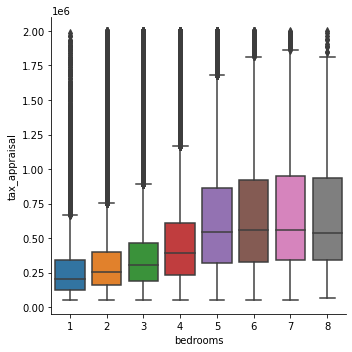

In [30]:
sns.catplot(data=train, x="bedrooms", y="tax_appraisal", kind="box")

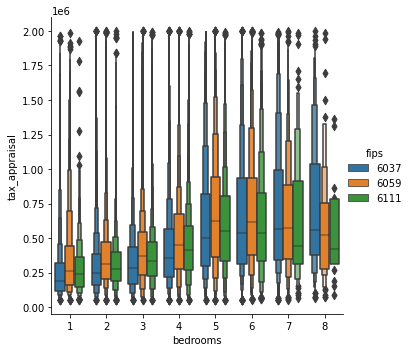

In [31]:
sns.catplot(data=train, x="bedrooms", y="tax_appraisal", hue="fips", kind="boxen")

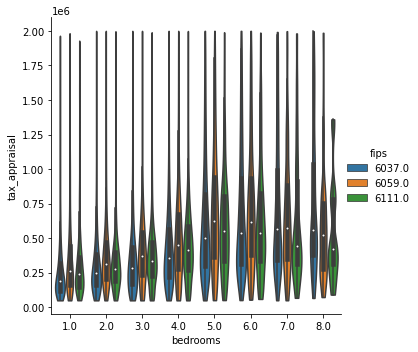

In [32]:
#### WTF does everything keep yelling about OBJECTS
#### ValueError: object arrays are not supported


sns.catplot(
    data=cont_df.astype('float64'), x="bedrooms", y="tax_appraisal", hue="fips",
    kind="violin", bw=.25, cut=0, split=False,
)

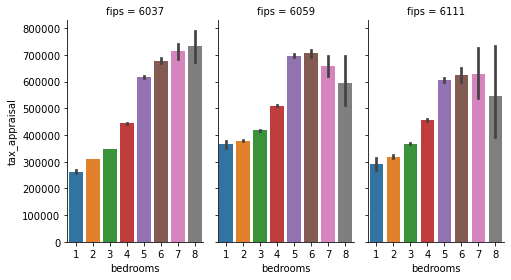

In [33]:
sns.catplot(
    data=train, x="bedrooms", y="tax_appraisal", col="fips",
    kind="bar", height=4, aspect=.6,
)

def plot_categorical_and_continuous_vars (df, cat_vars, cont_vars):
    """
    Takes in a dataframe and a list of the columns that hold the continuous and categorical features
    and outputs a boxplot, a violinplot, and a barplot comparing continuous and categorical features.
    """

    for col in cat_vars:
        for col2 in cont_vars:
            fig, (ax1, ax2, ax3) = plt.subplots (1,3, figsize= (16,6))
            fig.suptitle(f' (col) vs. (col2)')
            sns.boxplot (data=df, x=col, y=co12, ax=ax1) 
            sns.violinplot (data=df, x=col, y=col2, ax=ax2) 
            sns.barplot (data=df, x=col, y=col2,ax=ax3)
            plot.show()
            
# NameError: name 'co12' is not defined

# NameError: name 'co12' is not defined

plot_categorical_and_continuous_vars (train, cat_vars, cont_vars)

def plot_categoeical(ser:pd.Series, ax:plt.axes):
    sns.countplot(ser,ax=ax[0])
    ax[1].pie(ser.value_counts(), labels=ser.unique())
def plot_continuous(ser:pd.Series, ax:plt.axes):
    sns.histplot(ser, ax=ac[0])
    sns.violinplot(ser, ax=ac[1]
def plot_categorical_and_continuous(df:pd.DataFrame, categorical:typing.List[str])->None:
                   fig, axs = plt.subplots(df.shape[1], 2, figsize=(9,df.shape[1]*3))
                   for i, d in enumerate(df):
                       if d in categorical:
                           plot_categorical(df[d],axs[i:])
                       else:
                           plot_continuous(df[d],axs[i:])
    plot.show
    
# I don't understand the Arguments for these functions

# 5. Save the functions you have written to create visualizations in your ```explore.py``` file. Rewrite your notebook code so that you are using the functions imported from this file.

### ANSWER:
* I'm using a combined py file called ```QMCBT_explore_evaluate.py``` and I've imported it as ```ee```

# 6. Use the functions you created above to explore your ```Zillow train``` dataset in your ```explore.ipynb``` notebook.

### ANSWER:
* This **is** the ```explore.ipynb``` Notebook !?

# 7. Come up with some initial hypotheses based on your goal of predicting property value.

### ANSWER:
* SEE BELOW UNDER Q1 thru Q4

# 8. Visualize all combinations of variables in some way.

### ANSWER:
* SEE BELOW UNDER Q1 thru Q4

# 9. Run the appropriate statistical tests where needed.

### ANSWER:
* SEE BELOW UNDER Q1 thru Q4

<div class="alert alert-warning">


# Q1: Does Property Squarefoot impact the Property Tax Assessment Value?

## 7. Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **two_tail (sqft, taxvaluedollarcnt)**  
  
  
 * One Sample or Two Samples?  
  **two_sample (sqft, taxvaluedollarcnt)**  
  
  
 * Continuous or Discreat?  
  **Continuous (sqft) vs Continuous (taxvaluedollarcnt) = Pearson’s R**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: The property Tax Assesed Value is **NOT** ```dependent``` on the property squarefoot**.   
      * ```taxvaluedollarcnt``` != ```sqft```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: The property Tax Assesed Value is ```dependent``` on the property squarefoot**.  
      * ```taxvaluedollarcnt``` == ```sqft```

## 8. Visualization

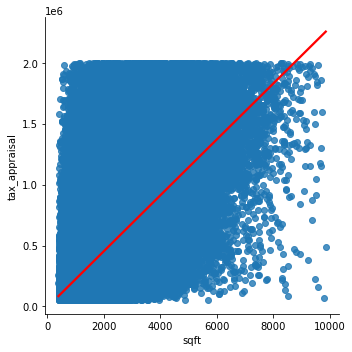

In [37]:
sns.lmplot(x='sqft', y='tax_appraisal', data=cont_df.astype('float64'), line_kws={'color': 'red'})
plt.show()

Text(0.5, 1.0, 'Features Correlating with Property Square Foot')

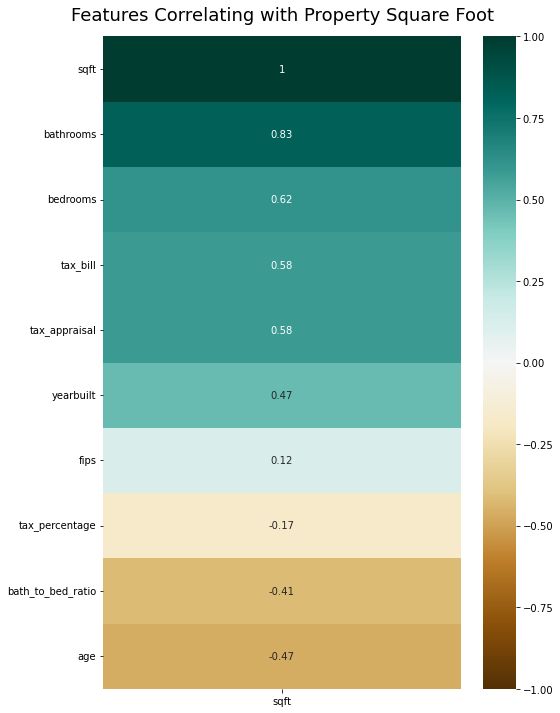

In [38]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='pearson')[['sqft']].sort_values(by='sqft', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Property Square Foot', fontdict={'fontsize':18}, pad=16)

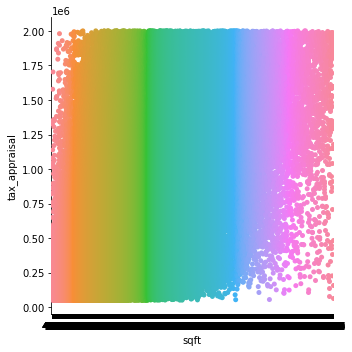

In [39]:
sns.catplot(data=train, y='tax_appraisal', x='sqft')

<AxesSubplot:xlabel='sqft'>

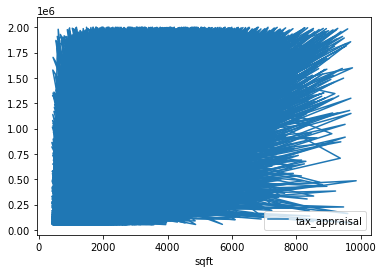

In [40]:
fig, ax = plt.subplots() # Create the figure and axes object

#### Plot the first x and y axes:
train.plot(x = 'sqft', y = 'tax_appraisal', ax = ax) 
#### Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
#### (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
#df.plot(x = 'lotsizesquarefeet', y = 'tax_appraisal', ax = ax, secondary_y = True) 

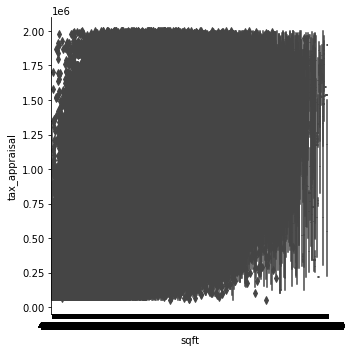

In [42]:
sns.catplot(data=cont_df.astype('float64'), x="sqft", y="tax_appraisal", kind="box")

## 9. Test Hypothesis

<div class="alert alert-warning">



# Pearson's R
**Compute test statistic and probability (r & p_value)**

In [46]:
r, p_val = stats.pearsonr(train.sqft,
                      train.tax_appraisal)
r, p_val

(0.5841982729302647, 0.0)

In [47]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-info">
    
    
The property Tax Assesed Value has a ```significant Relationhip``` with the property squarefoot

<div class="alert alert-warning">


# Q2: Does the number of Bedrooms impact the Tax Assesment Value?

## 7. Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **two_tail (bedrooms, tax_appraisal)**  
  
  
 * One Sample or Two Samples?  
  **two_sample (bedrooms, tax_appraisal)**  
  
  
 * Continuous or Discreat?  
  **Continuous (bedrooms) vs Continuous (tax_appraisal) = Pearson’s R**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: The property Tax Assesed Value is **NOT** ```dependent``` on the number of Bedrooms**.  
      * ```tax_appraisal``` != ```bedrooms```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: The property Tax Assesed Value is ```dependent``` on the number of Bedrooms**.  
      * ```tax_appraisal``` == ```bedrooms```  

## 8. Visualization

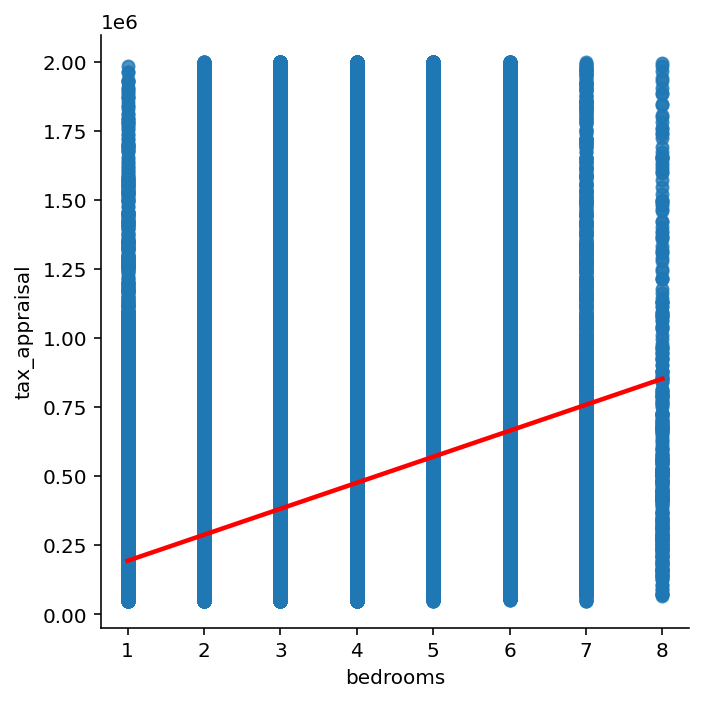

In [49]:
sns.lmplot(x='bedrooms', y='tax_appraisal', data=cont_df.astype('float64'), line_kws={'color': 'red'})
plt.show()

Text(0.5, 1.0, 'Features Correlating with Bedroom Count')

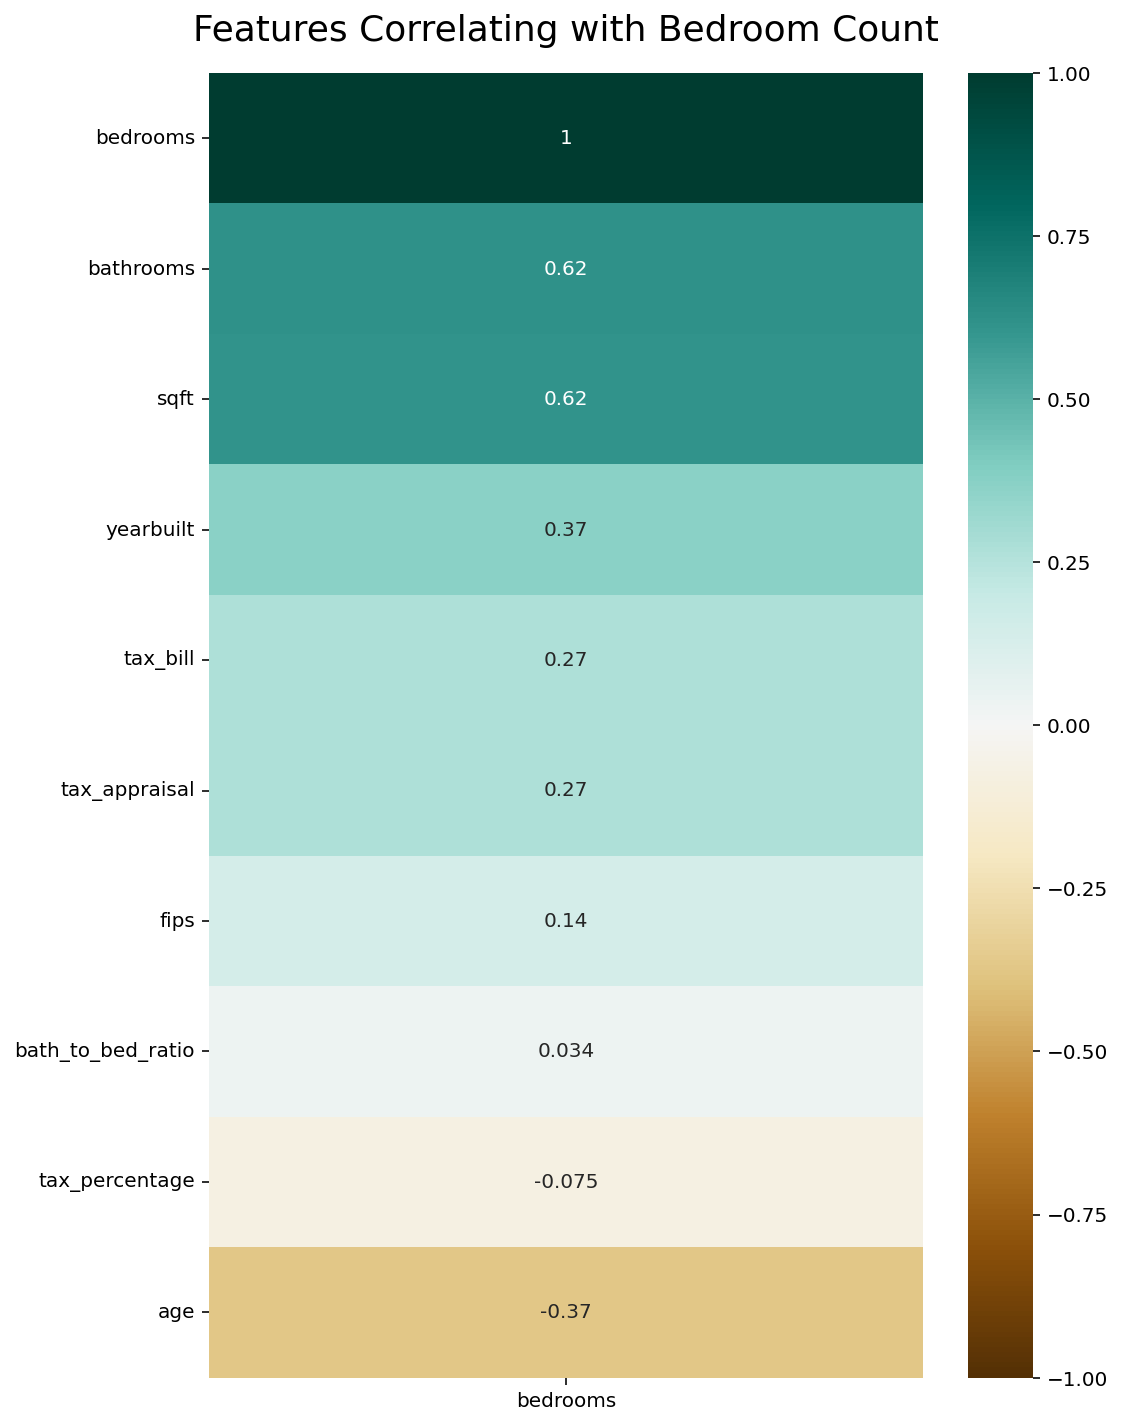

In [50]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='pearson')[['bedrooms']].sort_values(by='bedrooms', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Bedroom Count', fontdict={'fontsize':18}, pad=16)

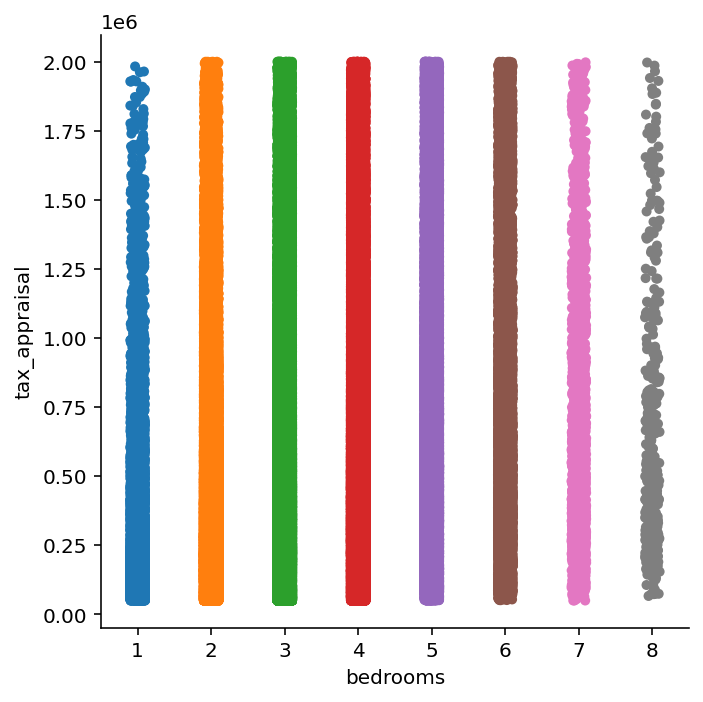

In [51]:
sns.catplot(data=train, y='tax_appraisal', x='bedrooms')

<AxesSubplot:xlabel='bedrooms'>

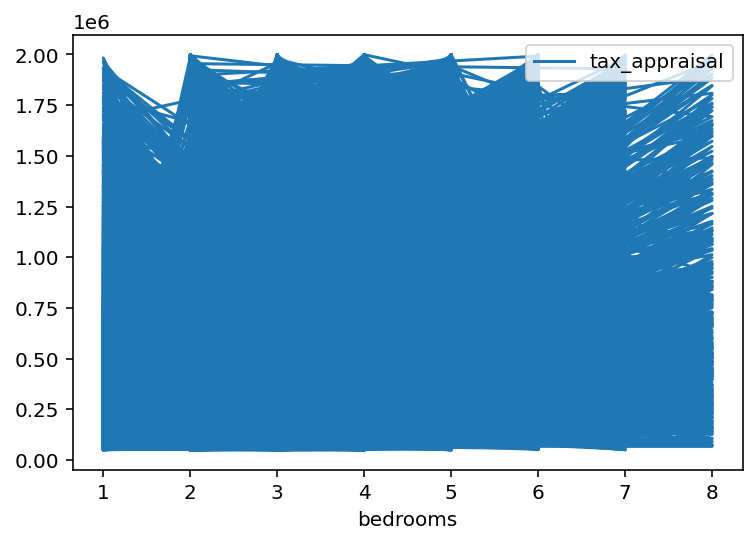

In [52]:
fig, ax = plt.subplots() # Create the figure and axes object

#### Plot the first x and y axes:
train.plot(x = 'bedrooms', y = 'tax_appraisal', ax = ax) 
#### Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
#### (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
#df.plot(x = 'lotsizesquarefeet', y = 'tax_appraisal', ax = ax, secondary_y = True) 

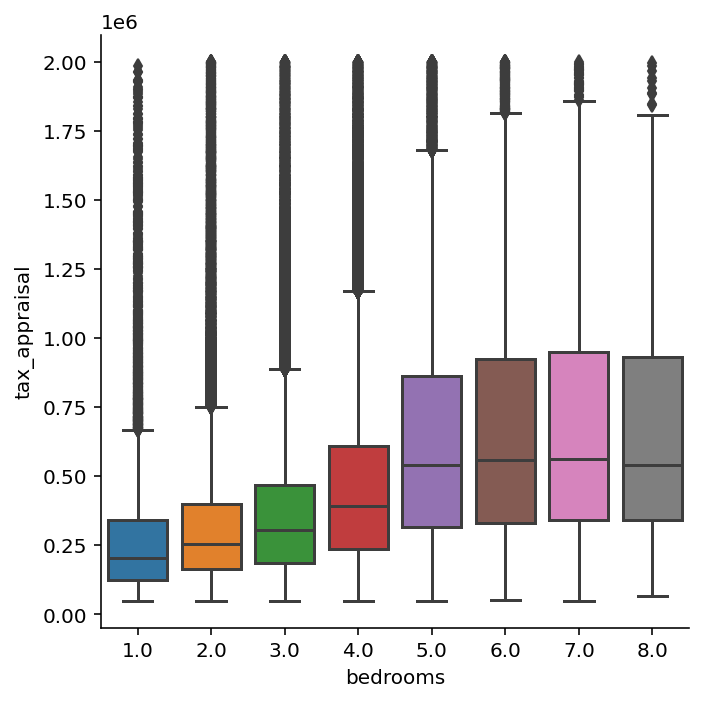

In [54]:
sns.catplot(data=cont_df.astype('float64'), x="bedrooms", y="tax_appraisal", kind="box")

## 9. Test Hypothesis

<div class="alert alert-warning">



# Pearson's R
**Compute test statistic and probability (r & p_value)**

In [55]:
r, p_val = stats.pearsonr(train.bedrooms,
                      train.tax_appraisal)
r, p_val

(0.2663616921532322, 0.0)

In [56]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-info">
    
    
The property Tax Assesed Value has a ```significant Relationhip``` with the number of Bedrooms

<div class="alert alert-warning">



# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [57]:
t_stat, p_val = stats.levene(train.bedrooms, train.tax_appraisal)

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.bedrooms, 
                                    train.tax_appraisal, 
                                    equal_var = False)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.bedrooms, 
                                    train.tax_appraisal, 
                                    equal_var = True)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
t-stat: -1435.0250500397583
p-value: 0.0


In [58]:
# """Comment out appropriate tail to run proper formula"""

# one_tail
"""
if (t > 0) and ((p / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""
    
# two_tail
if p_val < α:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


<div class="alert alert-info">
    
    
The property Tax Assesed Value has a ```significant Relationhip``` with the number of Bedrooms

<div class="alert alert-warning">


# Q3: Does the number of Bathrooms impact the Tax Assesment Value?

## 7. Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **two_tail (bathrooms, tax_appraisal)**  
  
  
 * One Sample or Two Samples?  
  **two_sample (bathrooms, tax_appraisal)**  
  
  
 * Continuous or Discreat?  
  **Continuous (bathrooms) vs Continuous (tax_appraisal) = Pearson’s R**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: The property Tax Assesed Value does **NOT** have a ```significant Relationhip``` with the number of Bedrooms**.  
      * ```tax_appraisal``` != ```bathrooms```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: The property Tax Assesed Value has a ```significant Relationhip``` with the number of Bedrooms**.  
      * ```tax_appraisal``` == ```bathrooms```  

## 8. Visualization

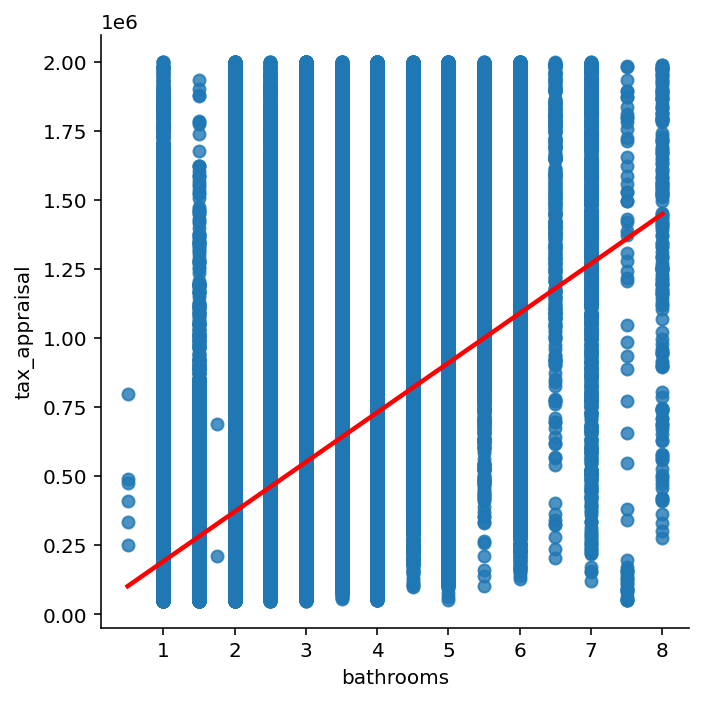

In [64]:
sns.lmplot(x='bathrooms', y='tax_appraisal', data=cont_df.astype('float64'), line_kws={'color': 'red'})
plt.show()

Text(0.5, 1.0, 'Features Correlating with Bathroom Count')

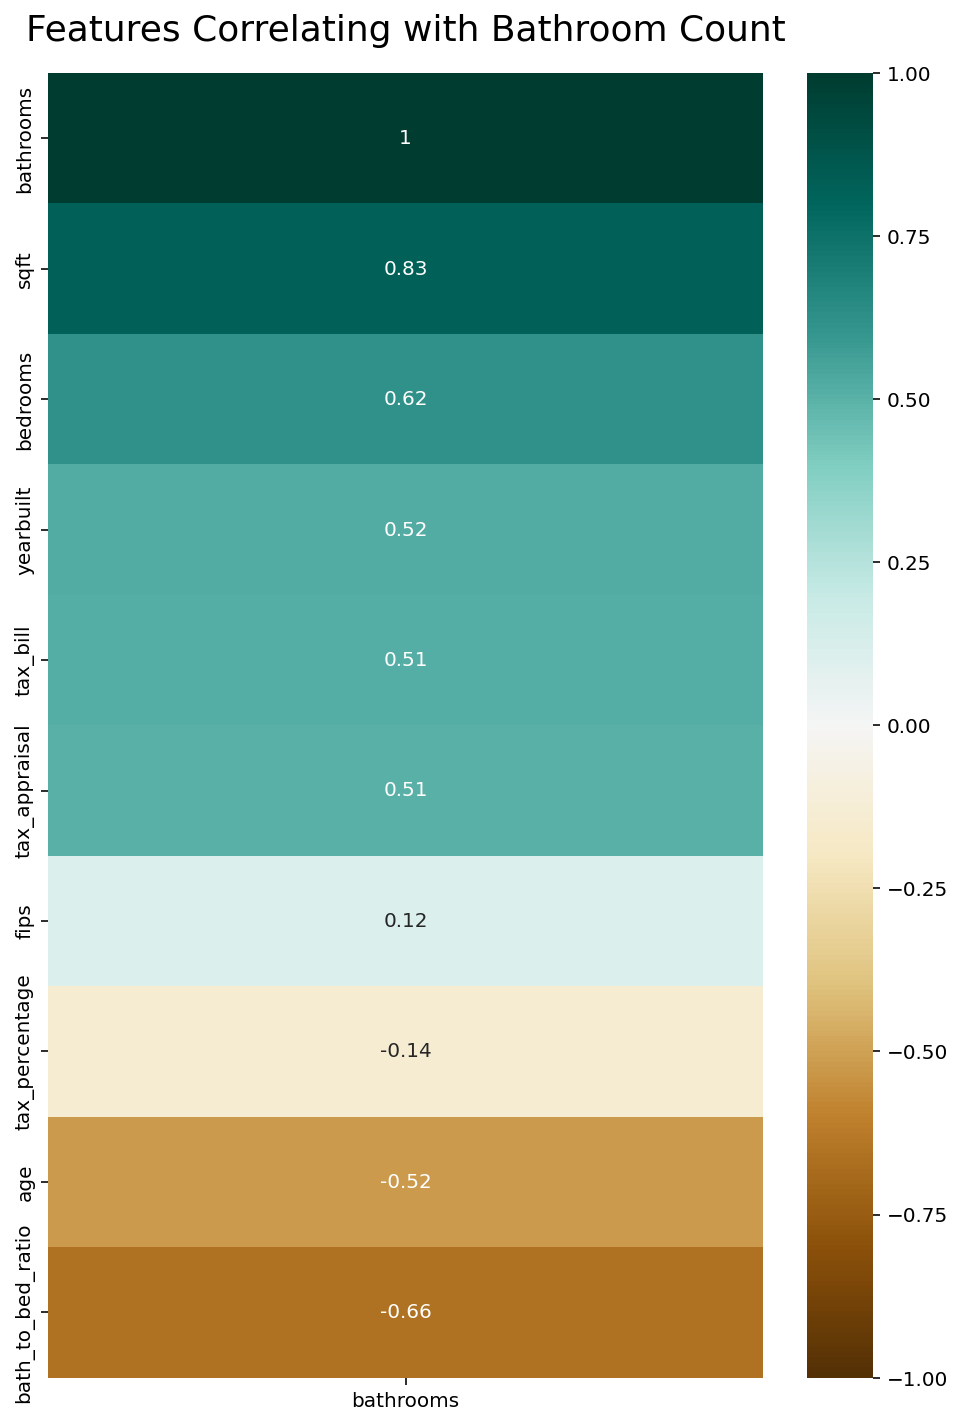

In [60]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='pearson')[['bathrooms']].sort_values(by='bathrooms', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Bathroom Count', fontdict={'fontsize':18}, pad=16)

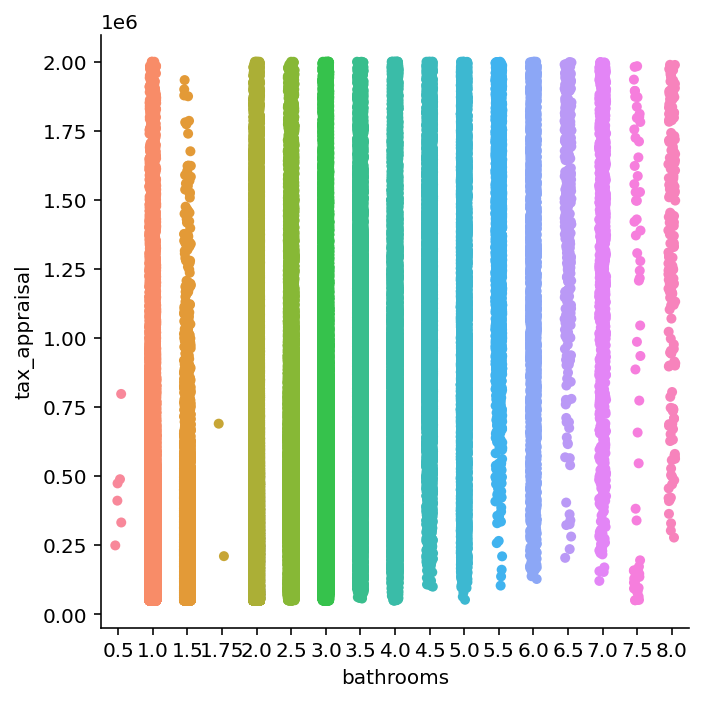

In [61]:
sns.catplot(data=train, y='tax_appraisal', x='bathrooms')

<AxesSubplot:xlabel='bathrooms'>

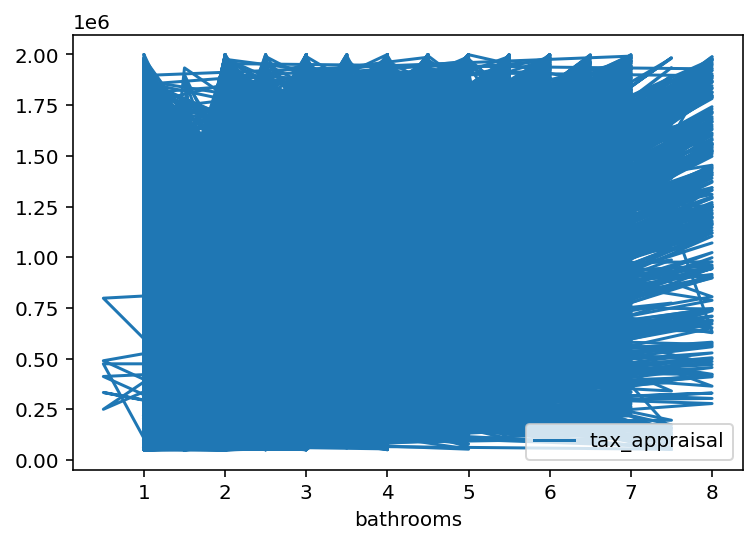

In [62]:
fig, ax = plt.subplots() # Create the figure and axes object

#### Plot the first x and y axes:
train.plot(x = 'bathrooms', y = 'tax_appraisal', ax = ax) 
#### Plot the second x and y axes. By secondary_y = True a second y-axis is requested:
#### (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html for details)
#df.plot(x = 'lotsizesquarefeet', y = 'tax_appraisal', ax = ax, secondary_y = True) 

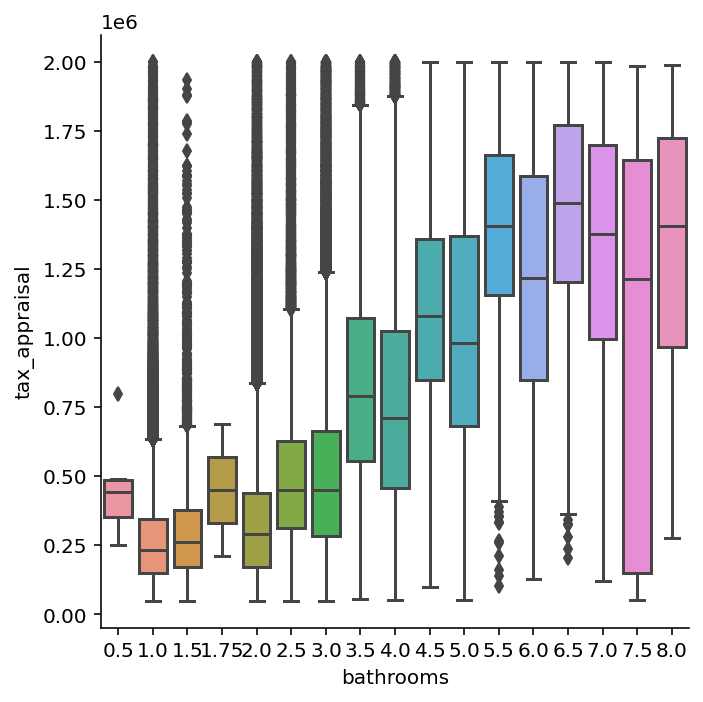

In [65]:
sns.catplot(data=cont_df.astype('float64'), x="bathrooms", y="tax_appraisal", kind="box")

## 9. Test Hypothesis

<div class="alert alert-warning">



# Pearson's R
**Compute test statistic and probability (r & p_value)**

In [66]:
r, p_val = stats.pearsonr(train.bathrooms,
                          train.tax_appraisal)
r, p_val

(0.5064638499517278, 0.0)

In [67]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-info">
    
    
The property Tax Assesed Value has a ```significant Relationhip``` with the number of Bathrooms

<div class="alert alert-warning">



# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [68]:
t_stat, p_val = stats.levene(train.bathrooms, train.tax_appraisal)

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.bathrooms, 
                                    train.tax_appraisal, 
                                    equal_var = False)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.bathrooms, 
                                    train.tax_appraisal, 
                                    equal_var = True)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
t-stat: -1435.0288375544037
p-value: 0.0


In [69]:
# """Comment out appropriate tail to run proper formula"""

# one_tail
"""
if (t > 0) and ((p / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""
    
# two_tail
if p_val < α:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


<div class="alert alert-info">
    
    
The property Tax Assesed Value has a ```significant Relationhip``` with the number of Bathrooms

<div class="alert alert-warning">


# Q4: Does the number of Bedrooms impact the the number of Bathrooms?

## 7. Hypothesis

**A. Set Hypothesis**  
  
 * One Tail (```<= | >```) or Two Tails (```== | !=```)?  
  **two_tail (bedrooms, bathrooms)**  
  
  
 * One Sample or Two Samples?  
  **two_sample (bedrooms, bathrooms)**  
  
  
 * Continuous or Discreat?  
  **Continuous (bedrooms) vs Continuous (bathrooms) = Pearson’s R**.  
      * T-Test = ```Discreat``` vs ```Continuous```  
      * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
      * $Chi^2$ = ```Discreat``` vs ```Discreat```  
  
  
 * $𝐻_0$: The opposite of what I am trying to prove  
  **$H_{0}$: The number of Bedrooms does **NOT** have a ```significant Relationhip``` with the number of Bathrooms**.  
      * ```bedrooms``` != ```bathrooms```  
  
  
 * $𝐻_𝑎$: What am I trying to prove  
  **$H_{a}$: The number of Bedrooms has a ```significant Relationhip``` with the number of Bathrooms**.  
      * ```bedrooms``` == ```bathrooms```  

## 8. Visualization

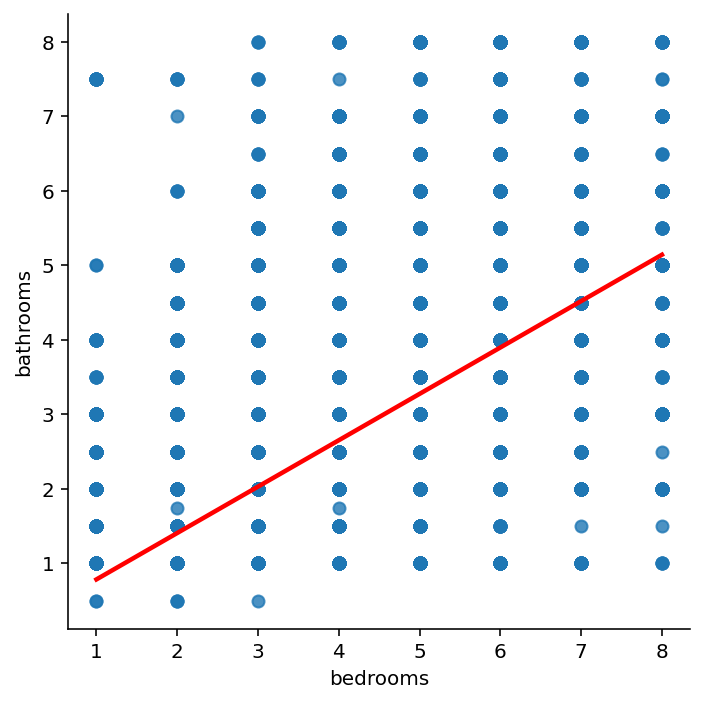

In [71]:
sns.lmplot(x='bedrooms', y='bathrooms', data=cont_df.astype('float64'), line_kws={'color': 'red'})
plt.show()

Text(0.5, 1.0, 'Features Correlating with Bedroom and Bathroom Ratio')

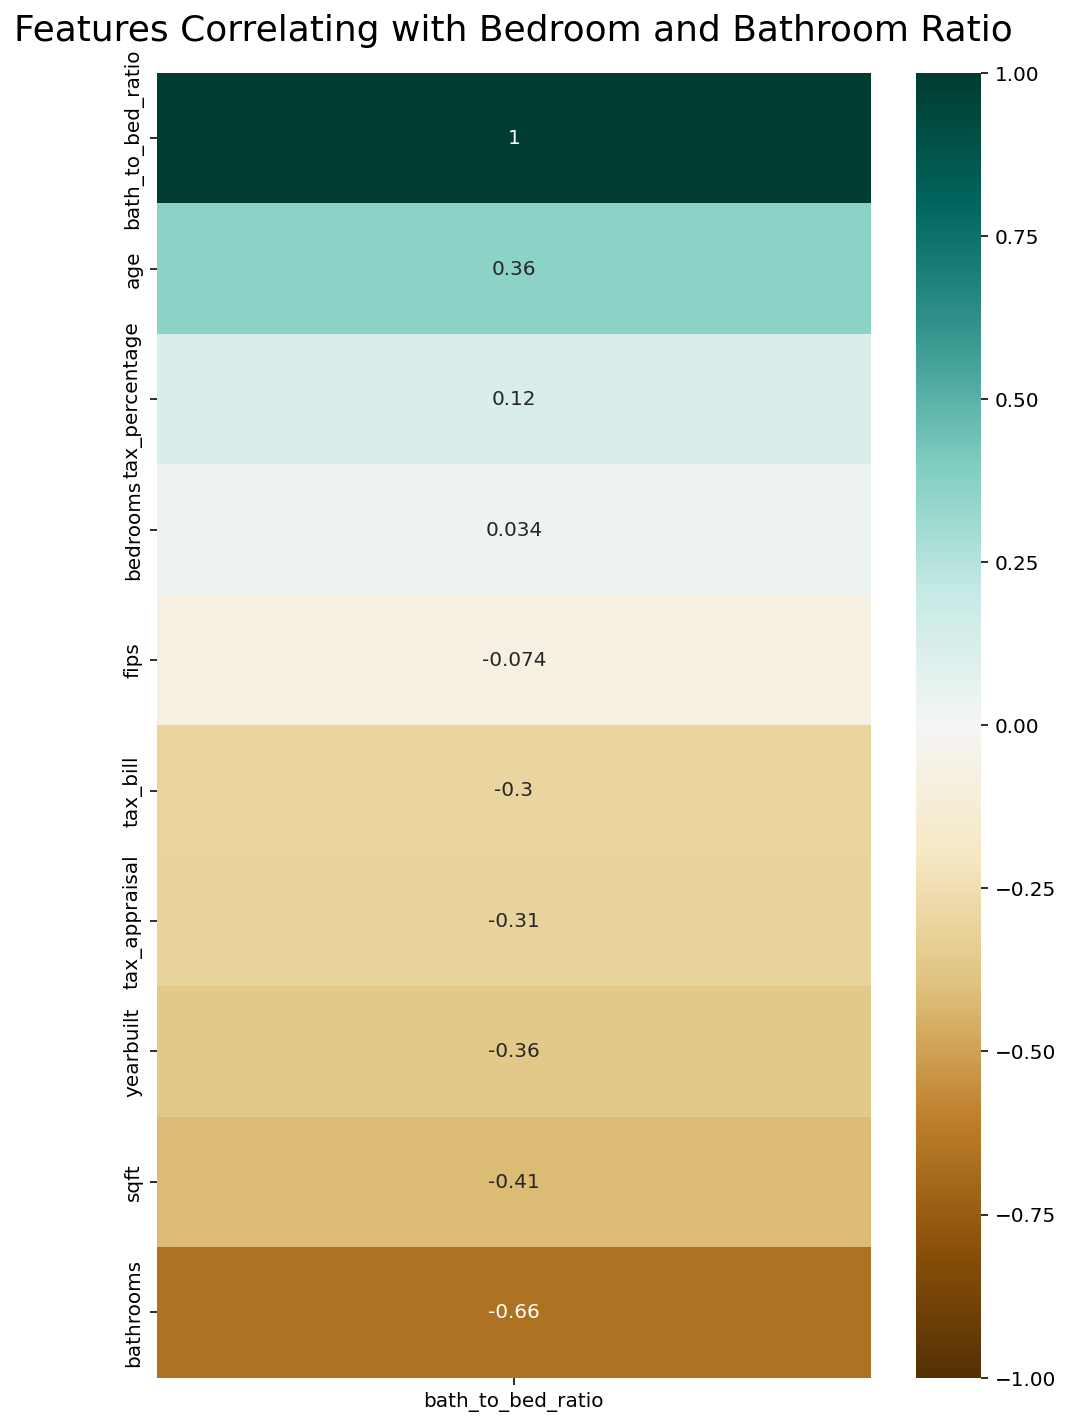

In [72]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='pearson')[['bath_to_bed_ratio']].sort_values(by='bath_to_bed_ratio', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Bedroom and Bathroom Ratio', fontdict={'fontsize':18}, pad=16)

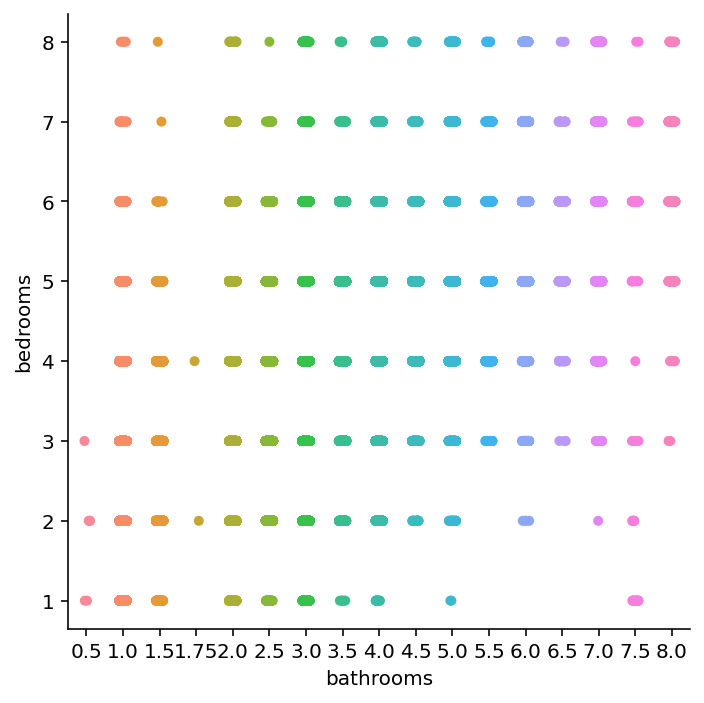

In [73]:
sns.catplot(data=train, x='bathrooms', y='bedrooms')

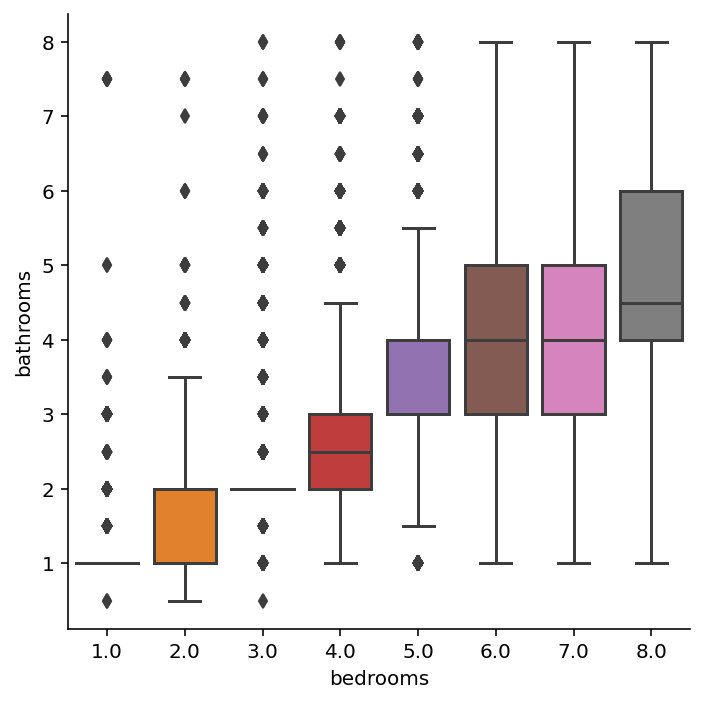

In [75]:
sns.catplot(data=cont_df.astype('float64'), x="bedrooms", y="bathrooms", kind="box")

## 9. Test Hypothesis

<div class="alert alert-warning">



# Pearson's R
**Compute test statistic and probability (r & p_value)**

In [76]:
r, p_val = stats.pearsonr(train.bedrooms,
                      train.bathrooms)
r, p_val

(0.6247923127187466, 0.0)

In [77]:
if p_val < α:
    print('Reject the null hypothesis')
else:
    print('Fail to reject the null hypothesis')

Reject the null hypothesis


<div class="alert alert-info">
    
    
The number of Bedrooms has a ```significant Relationhip``` with the number of Bathrooms

<div class="alert alert-warning">



# T-Test
**Compute test statistic and probability (t-statistic & p-value)**

In [78]:
t_stat, p_val = stats.levene(train.bathrooms, train.bedrooms)

if p_val < α:
    print('equal_var = False (we cannot assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.bathrooms, 
                                    train.bedrooms, 
                                    equal_var = False)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

else:
    print('equal_var = True (we will assume equal variance)')
    #Using Scipy 
    t_stat, p_val = stats.ttest_ind(train.bathrooms, 
                                    train.bedrooms, 
                                    equal_var = True)
    print(f't-stat: {t_stat}')
    print(f'p-value: {p_val}')

equal_var = False (we cannot assume equal variance)
t-stat: -947.9138690834214
p-value: 0.0


In [79]:
# """Comment out appropriate tail to run proper formula"""

# one_tail
"""
if (t > 0) and ((p / 2) < α):
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')
"""
    
# two_tail
if p_val < α:
    print('We can reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

We can reject the null hypothesis


<div class="alert alert-info">
    
    
The number of Bedrooms has a ```significant Relationhip``` with the number of Bathrooms

In [80]:
train.tax_appraisal.mean()

411211.66080531146

<div class="alert alert-warning">



# $Chi^2$
**Compute test statistic and probability (Observed, Expected, degf, p-value)**

In [81]:
observed = pd.crosstab(train.bedrooms, train.bathrooms)
observed

bathrooms,0.5,1.0,1.5,1.75,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.0
bedrooms,,,,,,,,,,,,,,,,,
1,2,10083,87,0,1096,27,119,5,12,0,2,0,0,0,0,12,0
2,3,116700,3616,1,53947,3248,5413,166,366,27,23,0,4,0,1,6,0
3,1,88437,11329,0,333812,36382,71457,3076,6162,625,625,37,76,4,13,4,3
4,0,5126,2510,1,149064,38571,130231,8886,20377,4258,4386,387,626,35,105,1,9
5,0,557,141,0,10390,3671,35465,3174,13893,4743,5970,1787,1737,101,352,8,37
6,0,90,9,0,833,256,3905,375,3274,426,1579,285,731,174,313,21,76
7,0,14,1,0,101,17,442,41,554,54,303,37,188,13,120,8,41
8,0,4,1,0,18,1,54,6,94,10,61,7,49,3,41,2,13


In [82]:
chi2, p_val, degf, expected = stats.chi2_contingency(observed)

In [83]:
#output values
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'Chi^2 = {chi2:.4f}')
print(f'p_val = {p_val}')

Observed
[[     2  10083     87      0   1096     27    119      5     12      0
       2      0      0      0      0     12      0]
 [     3 116700   3616      1  53947   3248   5413    166    366     27
      23      0      4      0      1      6      0]
 [     1  88437  11329      0 333812  36382  71457   3076   6162    625
     625     37     76      4     13      4      3]
 [     0   5126   2510      1 149064  38571 130231   8886  20377   4258
    4386    387    626     35    105      1      9]
 [     0    557    141      0  10390   3671  35465   3174  13893   4743
    5970   1787   1737    101    352      8     37]
 [     0     90      9      0    833    256   3905    375   3274    426
    1579    285    731    174    313     21     76]
 [     0     14      1      0    101     17    442     41    554     54
     303     37    188     13    120      8     41]
 [     0      4      1      0     18      1     54      6     94     10
      61      7     49      3     41      2     13]

In [84]:
if p_val < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


<div class="alert alert-info">
    
    
The number of Bedrooms has a ```significant Relationhip``` with the number of Bathrooms

# 10. What independent variables are correlated with the dependent variable, home value?

Text(0.5, 1.0, 'Features Correlating with Tax Appraisal')

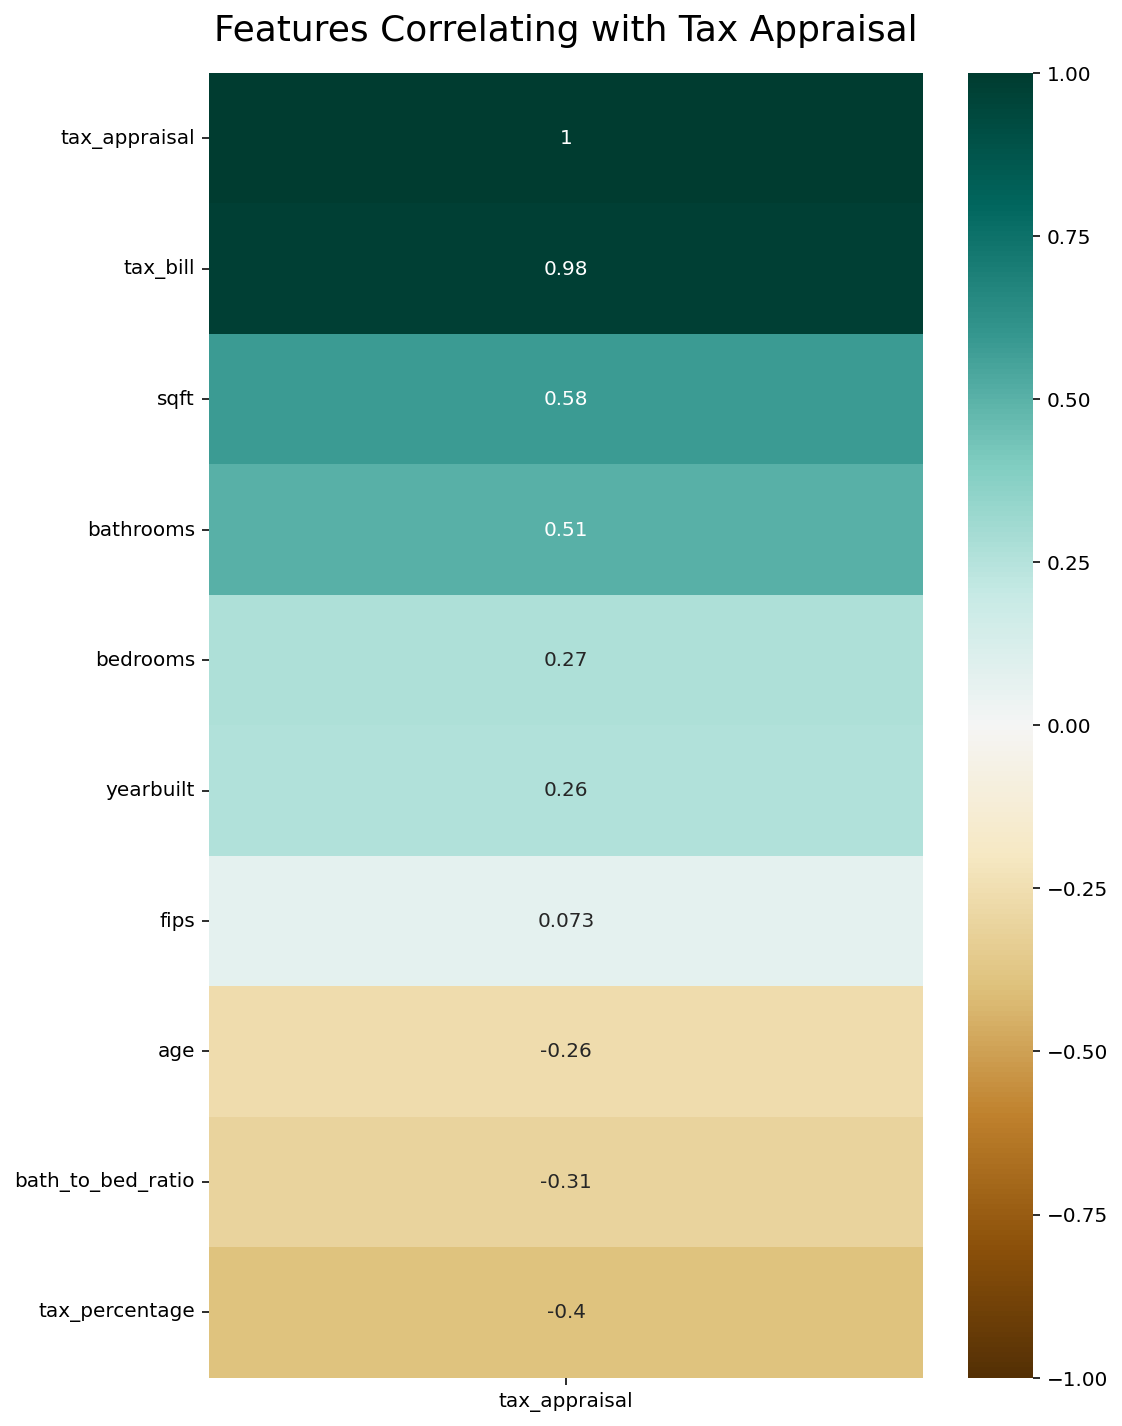

In [86]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr(method='pearson')[['tax_appraisal']].sort_values(by='tax_appraisal', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Tax Appraisal', fontdict={'fontsize':18}, pad=16)

# 11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

In [87]:
# create the correlation matrix using pandas .corr()
exam_corr = train.corr(method='pearson')
exam_corr

,bedrooms,bathrooms,bath_to_bed_ratio,sqft,yearbuilt,age,tax_appraisal,tax_bill,tax_percentage,fips
bedrooms,1.000000,0.624792,0.034318,0.616703,0.371952,-0.371952,0.266362,0.269793,-0.074886,0.144133
bathrooms,0.624792,1.000000,-0.663112,0.825245,0.519341,-0.519341,0.506464,0.511543,-0.142690,0.115930
bath_to_bed_ratio,0.034318,-0.663112,1.000000,-0.414692,-0.363059,0.363059,-0.305474,-0.303924,0.117983,-0.074075
sqft,0.616703,0.825245,-0.414692,1.000000,0.465334,-0.465334,0.584198,0.584711,-0.170510,0.122728
yearbuilt,0.371952,0.519341,-0.363059,0.465334,1.000000,-1.000000,0.261276,0.271466,-0.033987,0.303532
age,-0.371952,-0.519341,0.363059,-0.465334,-1.000000,1.000000,-0.261276,-0.271466,0.033987,-0.303532
tax_appraisal,0.266362,0.506464,-0.305474,0.584198,0.261276,-0.261276,1.000000,0.982452,-0.397893,0.072687
tax_bill,0.269793,0.511543,-0.303924,0.584711,0.271466,-0.271466,0.982452,1.000000,-0.275548,0.026429
tax_percentage,-0.074886,-0.142690,0.117983,-0.170510,-0.033987,0.033987,-0.397893,-0.275548,1.000000,-0.263898
fips,0.144133,0.115930,-0.074075,0.122728,0.303532,-0.303532,0.072687,0.026429,-0.263898,1.000000


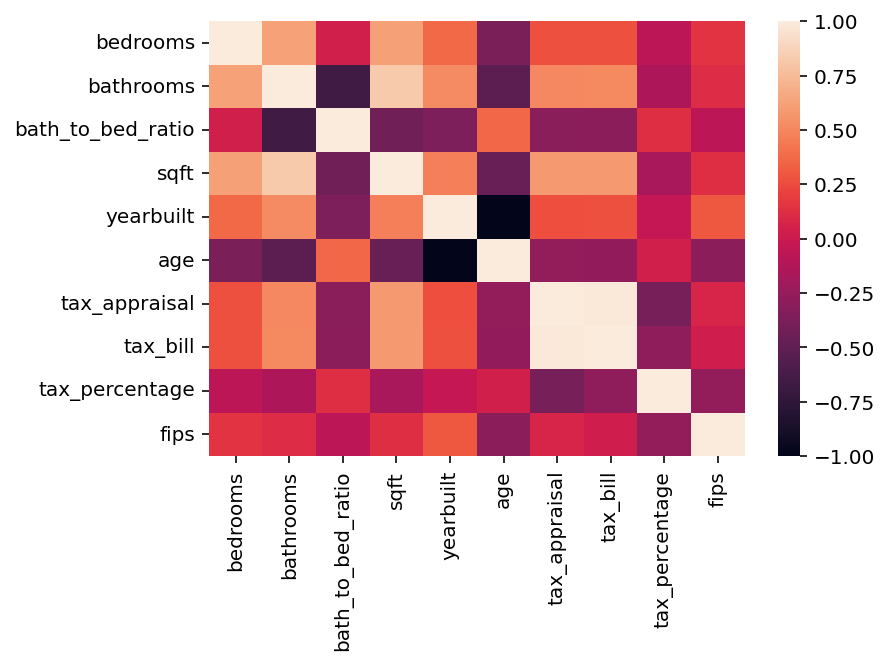

In [88]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(exam_corr)
plt.show()

In [89]:
np.triu(exam_corr)

array([[ 1.        ,  0.62479231,  0.03431777,  0.61670257,  0.37195184,
        -0.37195184,  0.26636169,  0.26979325, -0.07488591,  0.14413304],
       [ 0.        ,  1.        , -0.66311247,  0.82524544,  0.51934068,
        -0.51934068,  0.50646385,  0.51154315, -0.14269001,  0.11593035],
       [ 0.        ,  0.        ,  1.        , -0.41469179, -0.36305887,
         0.36305887, -0.30547397, -0.30392437,  0.1179829 , -0.07407513],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.46533383,
        -0.46533383,  0.58419827,  0.58471108, -0.17050984,  0.12272828],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        -1.        ,  0.26127565,  0.27146646, -0.03398729,  0.30353227],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        , -0.26127565, -0.27146646,  0.03398729, -0.30353227],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.98245175

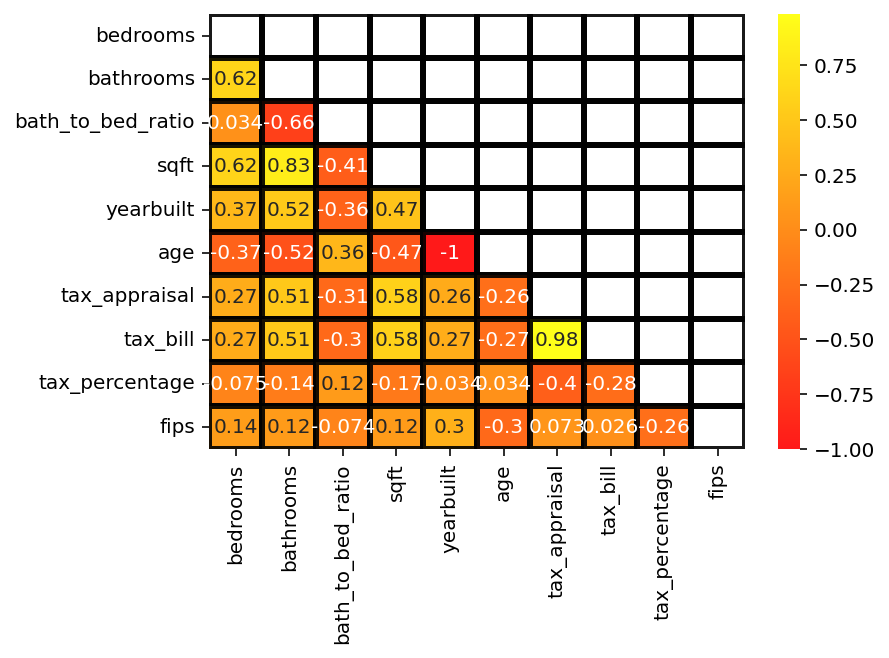

In [90]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black'}

sns.heatmap(exam_corr, cmap='autumn', annot=True, 
            mask=np.triu(exam_corr), **kwargs)
plt.show()

# 12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

# 13. Explore your dataset with any other visualizations you think will be helpful.

# Bonus Exercise
In a seperate notebook called ```explore_mall```, use the functions you have developed in this exercise with the ```mall_customers``` dataset in the ```Codeup database server```. You will need to write a sql query to ```acquire``` your data. Make ```spending_score``` your target variable.